In [2]:
from collections import Counter
import statistics as stat  # mean(), medain(), mode().....
from matplotlib import pyplot as plt
import math
from functools import partial # partial, reduce 
import random


In [27]:
def median(v):
    """ Trouver la valeur la plus au milieu de v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    if n % 2 == 1:
        #si impair, retourner la moyenne des valeurs du milieu"
        return sorted_v[midpoint]
    else:
        # si pair, retourner la moyenne des valeurs du milieu
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

def quantile(x,p):
    """retourne le percentile  pieme dans x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

def mode(x):
    """ retourne une liste donc le premier element est le mode, peut concerner plus d''un mode"""
    counts = Counter(x)
    print(counts)
    
    max_count = max(counts.values())
    print(counts.values())
    print(max_count)
    
    print(counts.items())
    return [x_i for x_i, count in counts.items()]
    

#  La dispersion

def data_range(x):
    return max(x) - min(x)

x = [1,2,3,4,5,6,1,2,3,4,8]
y = [1,2,3]
#print(data_range(x))

def de_mean(x):
    """calcul la difference entre chaque lement de x et la moyenne de x"""
    x_bar = stat.mean(x)
    return [x_i - x_bar for x_i in x]


def variance(x):
    """ calcul de la variance de x en supposant que x a aumoins 2 elements"""
    n = len(x)
    deviations = de_mean(x)
    print(deviations)
    print(sum_of_squares(deviations))
    return sum_of_squares(deviations) / (n - 1)



In [18]:
x = [1,2,3,4,5,6,1,1,2,2,3,3,4,5,6,1,1,2,2]
mode(x)

Counter({1: 5, 2: 5, 3: 3, 4: 2, 5: 2, 6: 2})
dict_values([5, 5, 3, 2, 2, 2])
5
dict_items([(1, 5), (2, 5), (3, 3), (4, 2), (5, 2), (6, 2)])


[1, 2, 3, 4, 5, 6]

##  Probabilites, chapitre 6

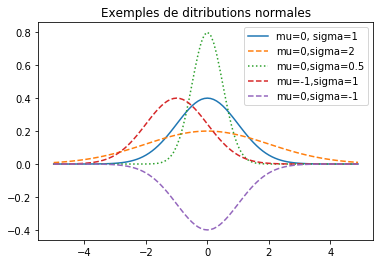

In [13]:
# Distribution normale
def normal_pdf(x,mu=0,sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) **2 /2/ sigma **2)/ (sqrt_two_pi * sigma))


xs = [x /10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0, sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'--',label='mu=-1,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=-1) for x in xs],'--',label='mu=0,sigma=-1')
plt.legend()
plt.title("Exemples de ditributions normales")
plt.show()
# mu = 0 veut dire que c'est centree en 0



In [14]:
# fonction de repartition de la loi normale

def normal_cdf(x,mu=0, sigma=1):
    return(1 + math.erf((x-mu)/ math.sqrt(2) / sigma))/2


In [ ]:
# Hypotheses et inference


## Descente du gradient

Le module functools est utilisé pour des fonctions de haut niveau : des fonctions qui agissent sur ou revoient d'autres fonctions. En général, tout objet appelable peut être utilisé comme une fonction pour les besoins de ce module.

In [7]:
# Estimer le gradient
def difference_quotient(f,x,h):
    return (f(x + h) -f(x)) / h
# quand h tend vers zero

def square(x):
    return x *x

def derivative(x):
    """ derivee de la fonction square"""
    return 2 * x


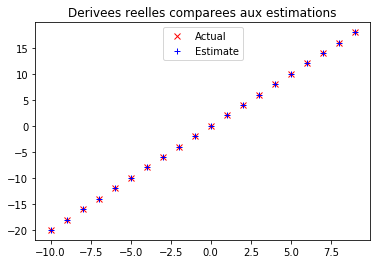

In [22]:
derivative_estimate = partial(difference_quotient, square,h=0.00001)
#print(derivative_estimate)

# graphique pour prouver que ce sont fondamentalement les memes
x = range(-10,10)
y = list(map(derivative, x))  # converti en liste car map retourne un generateur
z =  list(map(derivative_estimate, x))

plt.title("Derivees reelles comparees aux estimations")
plt.plot(x, y, 'rx', label='Actual') # rouge x
plt.plot(x,z, 'b+', label='Estimate') # bleu +
plt.legend(loc=9)
plt.show()


In [25]:
def partial_difference_quotient(f,v,i,h):
    """ calcule le ieme quotient partiel des differences de f a v"""
    w = [v_j + (h if j == i else 0)  # ajoure h pour ajuster le ieme element de v
         for j, v_j in enumerate(v)]
    return(f(w)-f(v)) / h

# Estimons le gradient de la meme facon en calcule  le quotient de  difference en tout point

def estimate_gradient(f, v, h=0.00001):
    """ estimation du gradient par calcul le quotient de difference  en chaque point"""
    return[partial_difference_quotient(f, v, i, h)
          for i,_ in enumerate(v)]


In [43]:
v = range(-10,10)
# calcul du gradient
z = partial(estimate_gradient, square,h=0.00001)

print(z)
#plt.title("gradient estime")
#plt.plot(x, y, 'rx', label='Actual') # rouge x
#plt.legend(loc=9)
#plt.show()

functools.partial(<function estimate_gradient at 0x7fe41ed76170>, <function square at 0x7fe41f319ef0>, h=1e-05)


In [5]:
# UTILISATION DU GRADIENT

def step(v,direction,step_size):
    """ se deplacer de step_size dans la direction v"""
    return [v_i + step_size * direction_i
          for v_i, direction_i in zip(v,direction)]

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

# choisir un point de depart aleatoire
v = [random.randint(-10,10) for i in range(3)]

tolerance = 0.0000001

while True:
    gradient = sum_of_squares_gradient(v) # calculer le gradient a v
    next_v = step(v,gradient, -0.01) # effectuer un deplacement negatif
    if distance(next_v, v) < tolerance : # s'arreter en cas de convergence
        break
    v = next_v                          # continuer sinon
    


NameError: name 'distance' is not defined

In [4]:
v = [random.randint(-10,10) for i in range(3)]
print(v)

[1, 9, 2]


In [ ]:
# decente dugradient stochastique
